In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

##출처
* ai허브 :https://www.aihub.or.kr



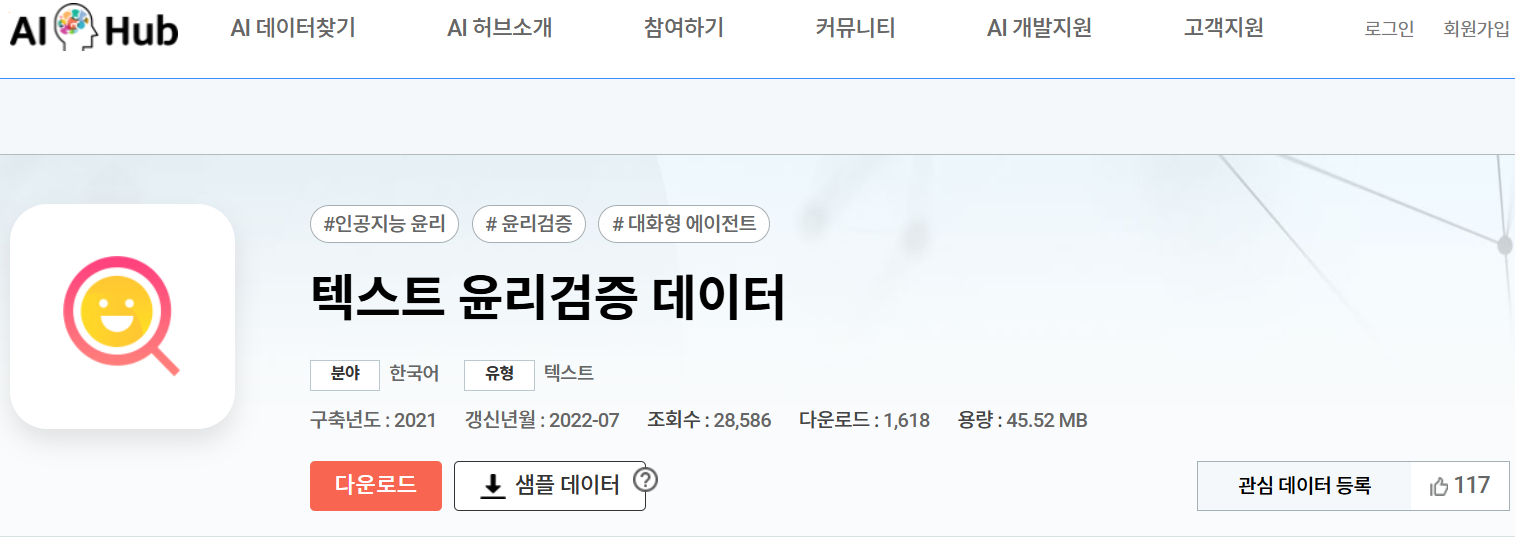

In [ ]:
!pip install koreanize-matplotlib
!pip install konlpy    #한글 형태소분석

# 1) 텍스트데이터 > csv로 변환

In [ ]:
import io
import re
import pandas as pd
def parse_raw_text(raw: str):
    # 1. 줄 끝에 '\'가 있고 실제 개행이면 이어붙임 (line continuation)
    raw = re.sub(r'\\\n', '', raw)

    # 2. 리터럴 '\n'을 실제 줄바꿈으로 바꿔서 행 분리
    raw = raw.replace('\\n', '\n')

    # 3. 이제 탭을 기준으로 DataFrame으로 읽기
    #    컬럼이 헤더 없이 들어온 예시라 가정 -> header=None, 이름 붙여도 됨
    df = pd.read_csv(io.StringIO(raw), sep='\t', engine='python', header=None,
                     )
    return df

In [ ]:
text1=open('/content/drive/MyDrive/abc부트캠프/편지 문장 필터링/문장 학습 데이터/test5').read()
df1=parse_raw_text(text1)
df1.head(10)

,0,1,2,3,4,5
0,1,False,0.0,1,IMMORAL_NONE,<마미손> 이번에 해명 영상 올렸던데 봤어?
1,2,False,0.0,2,IMMORAL_NONE,어 <염따> 제대로 큰일 난거 같던데
2,3,True,1.0,3,ABUSE,<염따> 뭐됐지 ㅋㅋ 그럴줄 알았다 티팔이 샛기
3,1,False,0.0,1,IMMORAL_NONE,요즘 같은 시대에 모솔이 가능해?
4,2,False,0.0,2,IMMORAL_NONE,"흐음 글쎄.. 그럴 수도 있지, 뭐."
5,1,False,0.0,1,IMMORAL_NONE,어제 교수가 지 자식 볼 책 도서관에서 빌료오라고 함
6,2,False,0.0,2,IMMORAL_NONE,헐.. 무슨 너가 개인 비서도 아니고
7,3,True,3.0,3,VIOLENCE,죳나 늙어빠진 개꼰대 샛끼 ㅆ ㅣ벙벙샛끼 쳐 맞아야돼 집에가는 길에 쳐 죽이고 싶다
8,3,True,3.0,3,ABUSE,죳나 늙어빠진 개꼰대 샛끼 ㅆ ㅣ벙벙샛끼 쳐 맞아야돼 집에가는 길에 쳐 죽이고 싶다
9,1,False,0.0,1,IMMORAL_NONE,썸녀가 내 문신 보더니 더 안 만나겠대


# 2) 데이터 정제


## 컬럼 삭제 , 중복 문장 제거
컬럼 :  0대화 순서 , 1비도덕유무, 2강도, 3화자구분 , 4유형, 5문장
* 대화 순서 , 화자구분 동일 함으로 제거
* 같은 문장이 경우 유형이 다름 >> 제거

In [ ]:
#같은 문장의 경우 두가지
duplicates = df1[df1[5].duplicated(keep=False)]
df1= df1[~ df1[5].isin(duplicates[5])]
df1.head(10)

,0,1,2,3,4,5
0,1,False,0.0,1,IMMORAL_NONE,<마미손> 이번에 해명 영상 올렸던데 봤어?
1,2,False,0.0,2,IMMORAL_NONE,어 <염따> 제대로 큰일 난거 같던데
2,3,True,1.0,3,ABUSE,<염따> 뭐됐지 ㅋㅋ 그럴줄 알았다 티팔이 샛기
3,1,False,0.0,1,IMMORAL_NONE,요즘 같은 시대에 모솔이 가능해?
4,2,False,0.0,2,IMMORAL_NONE,"흐음 글쎄.. 그럴 수도 있지, 뭐."
5,1,False,0.0,1,IMMORAL_NONE,어제 교수가 지 자식 볼 책 도서관에서 빌료오라고 함
6,2,False,0.0,2,IMMORAL_NONE,헐.. 무슨 너가 개인 비서도 아니고
9,1,False,0.0,1,IMMORAL_NONE,썸녀가 내 문신 보더니 더 안 만나겠대
10,2,False,0.0,2,IMMORAL_NONE,헐... 그런 일이 있었구나
11,3,True,3.0,1,VIOLENCE,진짜 목에 칼 찔러 넣고 돌려 뽑고 싶다


## 컬럼이름 설정

In [ ]:
df1.columns=['대화 순서' , '비도덕', '강도', '회자구분' , '유형', '문장']
df1=df1.drop(['대화 순서','회자구분'],axis=1)

In [ ]:
df1

,비도덕,강도,유형,문장
0,False,0.0,IMMORAL_NONE,<마미손> 이번에 해명 영상 올렸던데 봤어?
1,False,0.0,IMMORAL_NONE,어 <염따> 제대로 큰일 난거 같던데
2,True,1.0,ABUSE,<염따> 뭐됐지 ㅋㅋ 그럴줄 알았다 티팔이 샛기
3,False,0.0,IMMORAL_NONE,요즘 같은 시대에 모솔이 가능해?
4,False,0.0,IMMORAL_NONE,"흐음 글쎄.. 그럴 수도 있지, 뭐."
...,...,...,...,...
12535,True,2.6,SEXUAL,역시 한국 여자답게 잘 벌리는 듯
12536,True,2.0,VIOLENCE,살처분 마렵다.
12537,True,1.8,VIOLENCE,해충들 더 디져서 지구에 도움이 되길..
12540,True,2.0,SEXUAL,밋틴건가... 차라리 다 벗지 ㅋㅋㅋ


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11647 entries, 0 to 12541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   비도덕     11647 non-null  bool   
 1   강도      11647 non-null  float64
 2   유형      11647 non-null  object 
 3   문장      11647 non-null  object 
dtypes: bool(1), float64(1), object(2)
memory usage: 375.3+ KB


## 데이터 불균형 처리

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Bert 사용에 필요한 모듈 불러오기
import tensorflow as tf
from transformers import BertTokenizer  #BERT임포트
from transformers import TFBertForSequenceClassification, TextClassificationPipeline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from transformers import logging
logging.set_verbosity_error()


In [ ]:
df1['유형'].unique()
#['IMMORAL_NONE', 'ABUSE', 'VIOLENCE', 'SEXUAL', 'DISCRIMINATION']
# -------------- ,  욕설        폭력      '선정       차별

array(['IMMORAL_NONE', 'ABUSE', 'VIOLENCE', 'SEXUAL', 'DISCRIMINATION'],
      dtype=object)

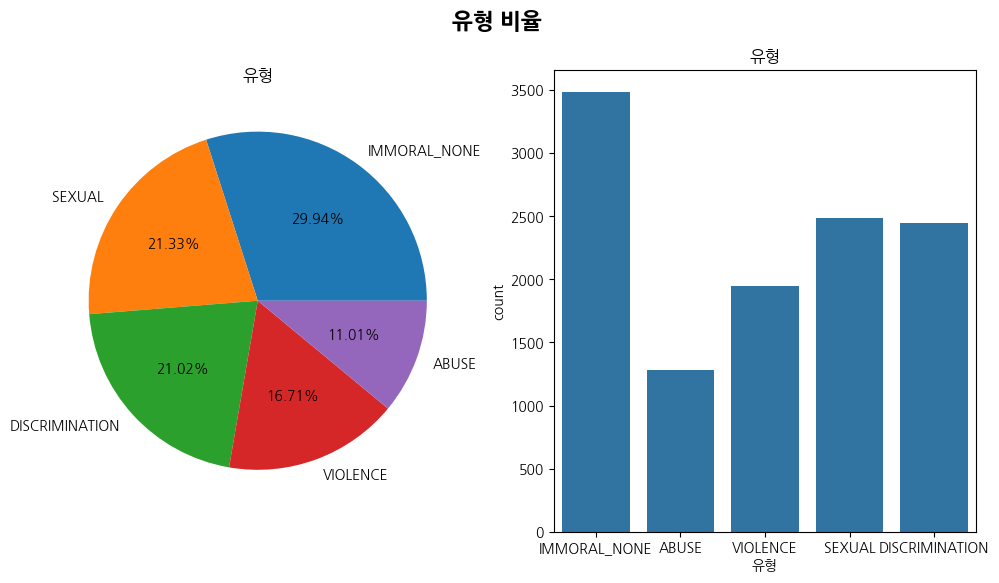

In [ ]:
#유형별 비율
f,ax=plt.subplots(1,2,figsize=(12,6))
df1['유형'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('유형')
ax[0].set_ylabel('')
sns.countplot(data=df1, x='유형',ax=ax[1])
ax[1].set_title('유형')


plt.suptitle('유형 비율', fontsize=16, fontweight='bold')
plt.show()

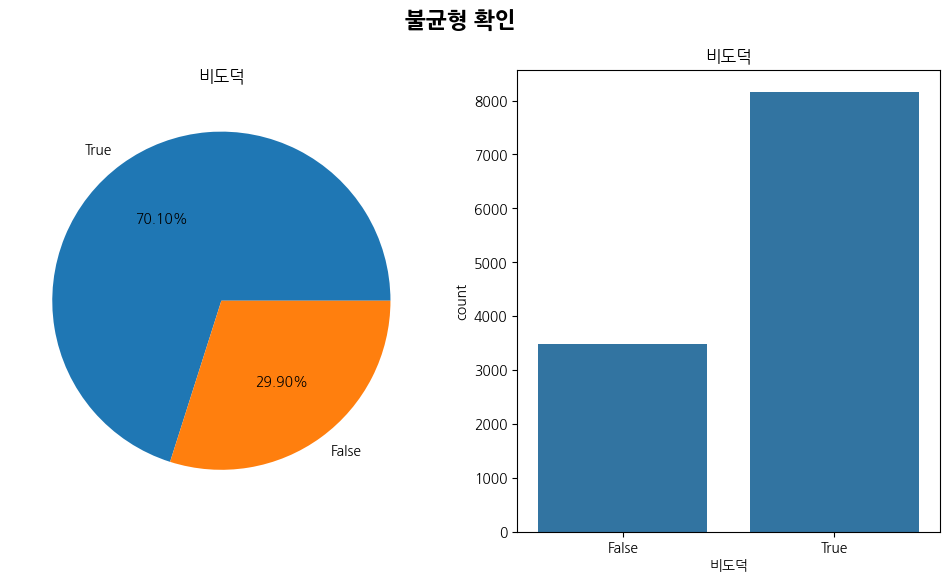

In [ ]:
# 데이터 불균칙 확인
f,ax=plt.subplots(1,2,figsize=(12,6))
df1['비도덕'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('비도덕')
ax[0].set_ylabel('')
sns.countplot(data=df1, x='비도덕',ax=ax[1])
ax[1].set_title('비도덕')


plt.suptitle('불균형 확인', fontsize=16, fontweight='bold')
plt.show()


In [ ]:
zero_rows = df1[df1['비도덕'] == 1]

to_drop = zero_rows.sample(frac=0.5, random_state=42).index
data = df1.drop(to_drop)

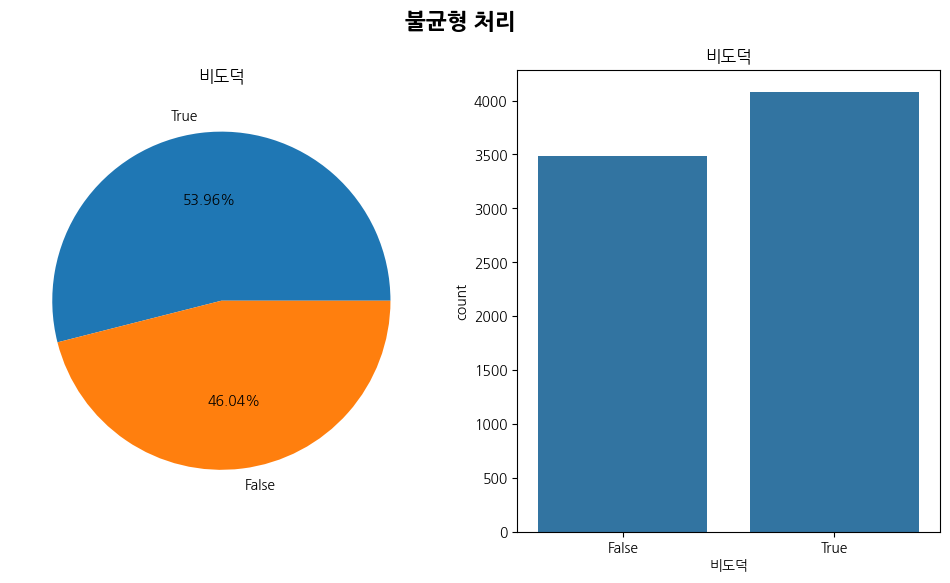

In [ ]:
# 데이터 불균칙 확인
f,ax=plt.subplots(1,2,figsize=(12,6))
data['비도덕'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('비도덕')
ax[0].set_ylabel('')
sns.countplot(data=data, x='비도덕',ax=ax[1])
ax[1].set_title('비도덕')

plt.suptitle('불균형 처리', fontsize=16, fontweight='bold')
plt.show()

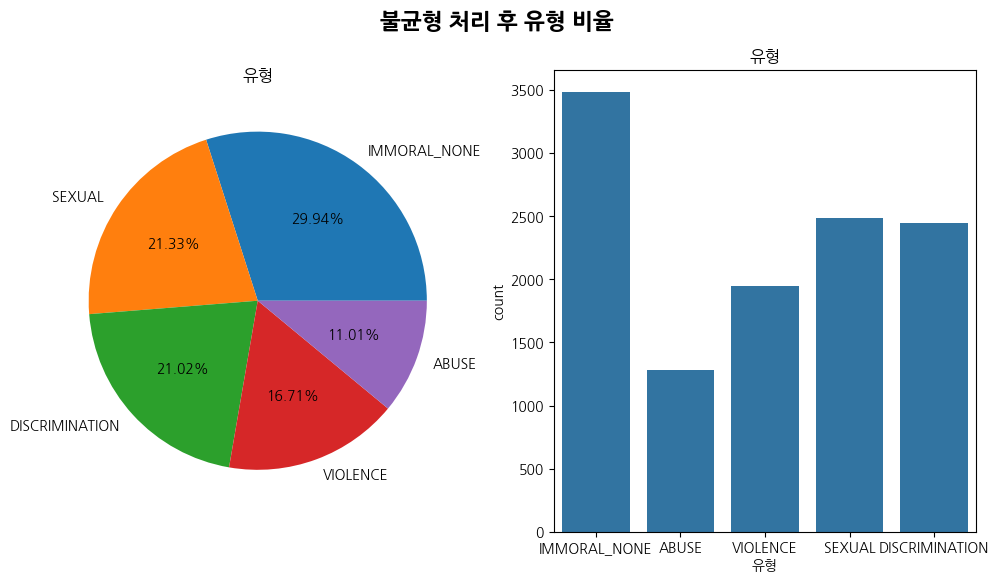

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df1['유형'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('유형')
ax[0].set_ylabel('')
sns.countplot(data=df1, x='유형',ax=ax[1])
ax[1].set_title('유형')


plt.suptitle('불균형 처리 후 유형 비율', fontsize=16, fontweight='bold')
plt.show()

# 데이터 분리 (종속vs독립 , 훈련vs검증)

In [ ]:
#종속 , 독립 분리 #불균형 처리
texts = data['문장']
labels = data['비도덕']
# texts = df1['문장']
# labels = df1['비도덕']

In [ ]:
labels

,비도덕
0,False
1,False
3,False
4,False
5,False
...,...
12526,True
12528,True
12534,True
12536,True


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train, y_val= train_test_split(texts, labels, test_size=0.3, shuffle = True, random_state = 777)

In [ ]:
print(x_train.shape, x_val.shape)

(5295,) (2270,)


# 학습 전 토큰 나이저

In [ ]:
# https://huggingface.co/google-bert/bert-base-multilingual-cased
# 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:


from tqdm import tqdm #상태바로 보여줌, 가시적 효과

def convert_data_tokenizer(examples, labels, max_seq_len, tokenizer):

    input_ids, attention_masks, token_type_ids, data_labels = [], [], [], []

    for example, label in tqdm(zip(examples, labels), total=len(examples)):
        encoded = tokenizer.encode_plus(
            example,
            max_length=max_seq_len,
            padding='max_length',         # 시퀀스 길이를 max_seq_len으로 고정
            truncation=True,              # 문장이 max_seq_len보다 길면 자름
            return_attention_mask=True,   # 어텐션 마스크 생성
            return_token_type_ids=True    # 세그먼트 ID 생성 (단일 문장: 전부 0)
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        token_type_ids.append(encoded['token_type_ids'])
        data_labels.append(label)

    # 리스트를 numpy array로 변환 (모델 학습을 위해)
    return (
        np.array(input_ids, dtype=np.int32),
        np.array(attention_masks, dtype=np.int32),
        np.array(token_type_ids, dtype=np.int32)
    ), np.array(data_labels, dtype=np.int32)



In [ ]:
# max_length를 128, 256, 512로 설정한 뒤 검증 데이터를 이용해 성능을 비교
# 64~128: 짧은 문장 분류나 간단한 작업에 적합
# 128~256: 대부분의 NLP 작업에서 좋은 성능과 효율성의 균형 제공
# 256~512: 긴 문장이나 문맥 이해가 중요한 작업에 유리하지만, 메모리 사용량이 커짐
train_x, train_y = convert_data_tokenizer(x_train, y_train, 128, tokenizer)
#(,,길이설정,)
test_x, test_y = convert_data_tokenizer(x_val, y_val, 128, tokenizer)

100%|██████████| 2270/2270 [00:01<00:00, 1621.05it/s]


In [ ]:
test_y
#이진 분류

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
print(type(test_y))

num_labels=2

<class 'numpy.ndarray'>


In [ ]:
# #모델 설정
# import tensorflow as tf


# optimizer = tf.keras.optimizers.Adam(1e-5)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')


In [ ]:

# from transformers import TFBertForSequenceClassification

# odel = TFBertForSequenceClassification.from_pretrained("bert-base-multilingual-cased",
#                                                         num_labels=num_labels, from_pt=True)

In [ ]:
#설정1- 학습 방법-아담알고리즘 , 합습률 10의 -5
optimizer = tf.keras.optimizers.Adam(1e-5) #하이퍼 파라미터 튜닝
#설정2 - 손실함수-로함수
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#설정3- 평가방법 지정
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')



#모델 구성 - BERT분류 모델의 클래스 사용 ,"bert-base-multilingual-cased":사전 학습 모델, num_label은 분류 개수,
model = TFBertForSequenceClassification.from_pretrained("bert-base-multilingual-cased",
                                                        num_labels=num_labels, from_pt=True)


# 컴파일 - 준비
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
BATCH_SIZE = 16
NUM_EPOCHS = 10
history = model.fit(train_x, train_y, epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE, validation_data=(test_x, test_y))

Epoch 1/10
331/331 [==============================] - 239s 505ms/step - loss: 0.4976 - accuracy: 0.7628 - val_loss: 0.4169 - val_accuracy: 0.8101
Epoch 2/10
331/331 [==============================] - 176s 532ms/step - loss: 0.3398 - accuracy: 0.8587 - val_loss: 0.3740 - val_accuracy: 0.8330
Epoch 3/10
331/331 [==============================] - 176s 532ms/step - loss: 0.2562 - accuracy: 0.8995 - val_loss: 0.4532 - val_accuracy: 0.8225
Epoch 4/10
331/331 [==============================] - 176s 531ms/step - loss: 0.1791 - accuracy: 0.9330 - val_loss: 0.5454 - val_accuracy: 0.8185
Epoch 5/10
331/331 [==============================] - 176s 531ms/step - loss: 0.1212 - accuracy: 0.9568 - val_loss: 0.5467 - val_accuracy: 0.8132
Epoch 6/10
331/331 [==============================] - 176s 531ms/step - loss: 0.0804 - accuracy: 0.9724 - val_loss: 0.5922 - val_accuracy: 0.8308
Epoch 7/10
331/331 [==============================] - 155s 469ms/step - loss: 0.0760 - accuracy: 0.9741 - val_loss: 0.6445 -

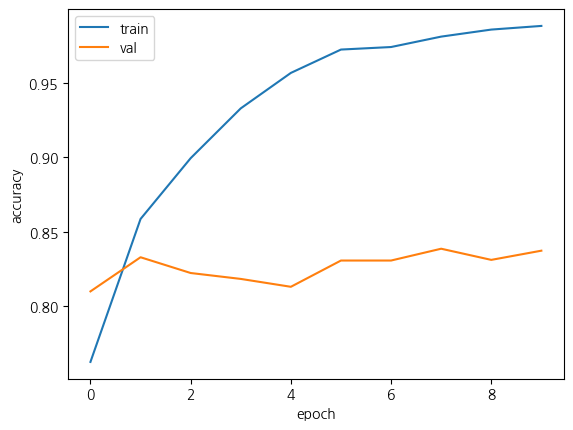

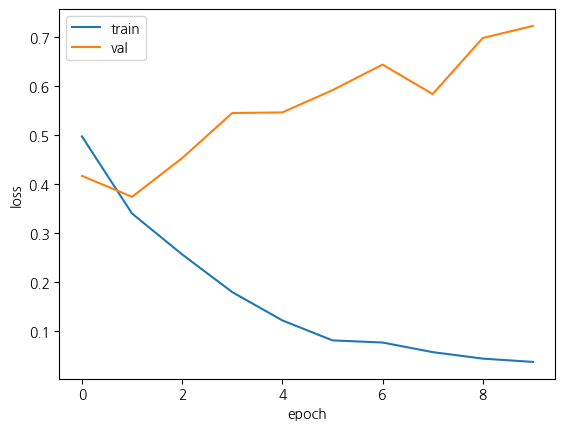

In [ ]:
# accuracy 확인
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()
# loss 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(test_x, test_y) # 오차, 정확도

71/71 [==============================] - 20s 274ms/step - loss: 0.7236 - accuracy: 0.8374


[0.7236177921295166, 0.8374449610710144]

In [ ]:
from sklearn.metrics import classification_report


y_pred = model.predict(test_x)
preds = np.argmax(y_pred.logits, axis=1)
bert_report = classification_report(test_y, preds)
print(bert_report)

71/71 [==============================] - 24s 281ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1008
           1       0.87      0.84      0.85      1262

    accuracy                           0.84      2270
   macro avg       0.84      0.84      0.84      2270
weighted avg       0.84      0.84      0.84      2270



In [ ]:
#모델 전체
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
y_true = test_y
print("accuracy_score: %.4f "%(accuracy_score(y_true, preds)))
print("precision_score: %.4f"%(precision_score(y_true, preds)))
print("recall_score: %.4f"%(recall_score(y_true, preds, )))
print("f1_score: %.4f"%(f1_score(y_true, preds, )))

accuracy_score: 0.8374 
precision_score: 0.8663
recall_score: 0.8368
f1_score: 0.8513


# 모델 적용

In [ ]:
# from transformers import TextClassificationPipeline

# # 기존 준비돼 있는 tokenizer, model 사용
# text_classifier = TextClassificationPipeline(
#     tokenizer=tokenizer,
#     model=model,
#     framework='tf',
#     return_all_scores=True
# )

# # 한 줄만 바꾸면 됨: 문자열 대신 input()
# input_self=input("분석할 문장을 입력하세요: ")
# result = text_classifier(input_self)[0]
# print(result)


In [ ]:
input_self

NameError: name 'input_self' is not defined

In [ ]:

label_map = {
    "LABEL_0": "도덕",
    "LABEL_1": "비도덕"
}
top = max(result, key=lambda x: x['score'])
label_name = label_map.get(top['label'], top['label'])
print(f"{input_self}의 예측결과 {top['score']*100:.2f}%로 {label_name} 문구입니다.")

# 모델,토큰 저장하기

In [ ]:
# 모델, 토크나이저 저장
model.save_pretrained('/content/drive/MyDrive/abc부트캠프/편지 문장 필터링/model_save_5')
tokenizer.save_pretrained('/content/drive/MyDrive/abc부트캠프/편지 문장 필터링/model_save_5')